In [3]:
import pandas as pd


In [4]:
# Check File Path: Ensure the file is located at the specified path. If you're unsure of the current working directory, you can check it with:
import os
print(os.getcwd())


C:\Users\tmc\Desktop\CAIYUN\PORTFOLIO\PORTFOLIO_BOOK\Cleaning\Python


In [5]:
# Ensure the File Path is Correct: Make sure that the file path is either:

# An absolute path (e.g., C:/Users/YourName/Desktop/CAIYUN/PORTFOLIO/PORTFOLIO_BOOK/Cleaning/Python/Book_cleaned.xlsx), or
# A relative path from the current working directory.

# Use Raw Strings (r prefix):
# You can make the string a raw string by adding an r before the string. This tells Python to treat backslashes literally and not as escape characters.

df = pd.read_excel(r"C:\Users\tmc\Desktop\CAIYUN\PORTFOLIO\PORTFOLIO_BOOK\Cleaning\Python\Book_cleaned.xlsx")


# Display the first few rows of the DataFrame
print(df.head(10))


   Book_ID   5                                              title  \
0  2767052  16                                   The Hunger Games   
1        2  41          Harry Potter and the Order of the Phoenix   
2     2657  21                              To Kill a Mockingbird   
3     1885  19                                Pride and Prejudice   
4    41865   8                                           Twilight   
5    19063  14                                     The Book Thief   
6   170448  11                                        Animal Farm   
7    11127  24                           The Chronicles of Narnia   
8       30  69  J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...   
9    18405  18                                 Gone with the Wind   

                                              series  \
0                                The Hunger Games #1   
1                                    Harry Potter #5   
2                              To Kill a Mockingbird   
3               

In [10]:
missing_value=df.isnull().sum()
missing_value

Book_ID                 0
5                       0
title                 197
series              29023
author                  9
rating                  0
language             3806
isbn                    0
edition             47554
pages                2347
publisher            3961
publishDate          1781
firstPublishDate    21327
numRatings              0
likedPercent          622
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

In [11]:
df.describe()

,Book_ID,5,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,5.247800e+04,52478.000000,52478.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000
mean,1.046889e+07,24.019742,4.021878,1.787865e+04,92.231545,1.984023e+03,22.529003
std,1.208011e+07,20.617561,0.367146,1.039448e+05,5.990689,3.515314e+04,369.158541
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,3.732408e+05,12.000000,3.820000,3.410000e+02,90.000000,8.400000e+01,1.000000
50%,6.443592e+06,18.000000,4.030000,2.307000e+03,94.000000,9.700000e+01,1.000000
75%,1.768628e+07,28.000000,4.230000,9.380500e+03,96.000000,1.870000e+02,2.000000
max,5.572613e+07,251.000000,5.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


In [37]:




# Convert 'price' to numeric, coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN in either 'price' or 'firstPublishDate'
df = df.dropna(subset=['price'])

# Sort by price in descending order
sorted_books = df.sort_values(by="price", ascending=False)

# Print the sorted prices and titles
print("Books sorted by price in descending order:")
print(sorted_books[['title', 'price']])


Books sorted by price in descending order:
                                               title   price
32984                             I See by My Outfit  898.64
11517                                  Viper's Creed  791.43
18834                                        Progeny  777.35
5808                                Children of Time  711.55
17663  The Oxford English Dictionary (20 Volume Set)  653.73
...                                              ...     ...
30532                                  The Dissident    0.84
36441                         Mao: The Unknown Story    0.84
30580                                    The Veteran    0.84
47924                           The Serpent's Shadow    0.84
31987                       The Mighty Book of Boosh    0.84

[25192 rows x 2 columns]


In [46]:
specific_row = df.iloc[32986]
print("\nRow at index 3 using .iloc[]:")
print(specific_row)


IndexError: single positional indexer is out-of-bounds

In [ ]:
# # Find the rows where the price is 50.00
# price_50 = df[df['price'] == 50.00]
# print("\nBooks with a price of 50.00:")
# print(price_50)


In [ ]:
# # Find rows where the first publish date is after 1980
# recent_books = df[df['firstPublishDate'] > '1980-01-01']
# print("\nBooks published after 1980:")
# print(recent_books)


In [13]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl



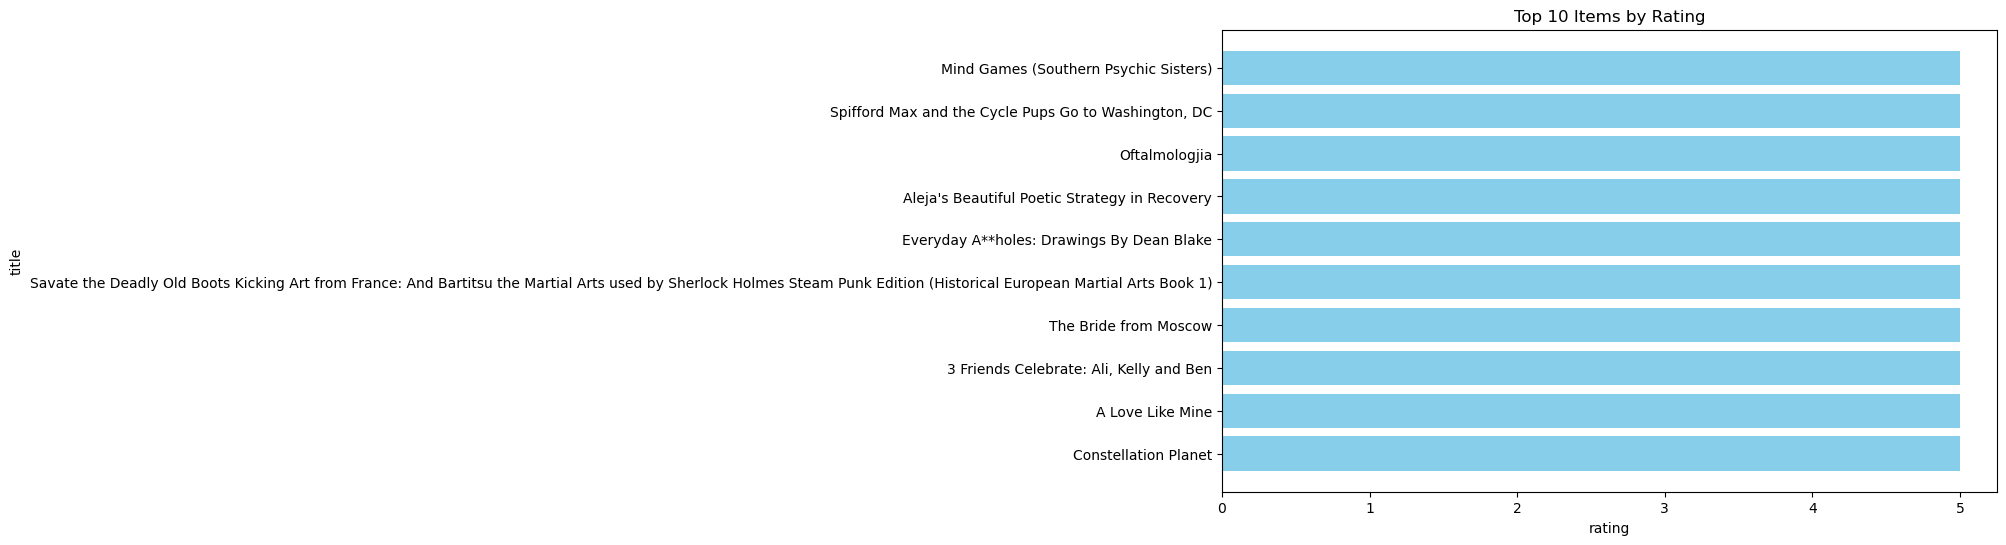

In [15]:
top_ranking = df.sort_values(by="rating", ascending=False).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_ranking["title"], top_ranking["rating"], color="skyblue")
plt.xlabel("rating")
plt.ylabel("title")
plt.title("Top 10 Items by Rating")
plt.gca().invert_yaxis()  # Highest rated at the top
plt.show()

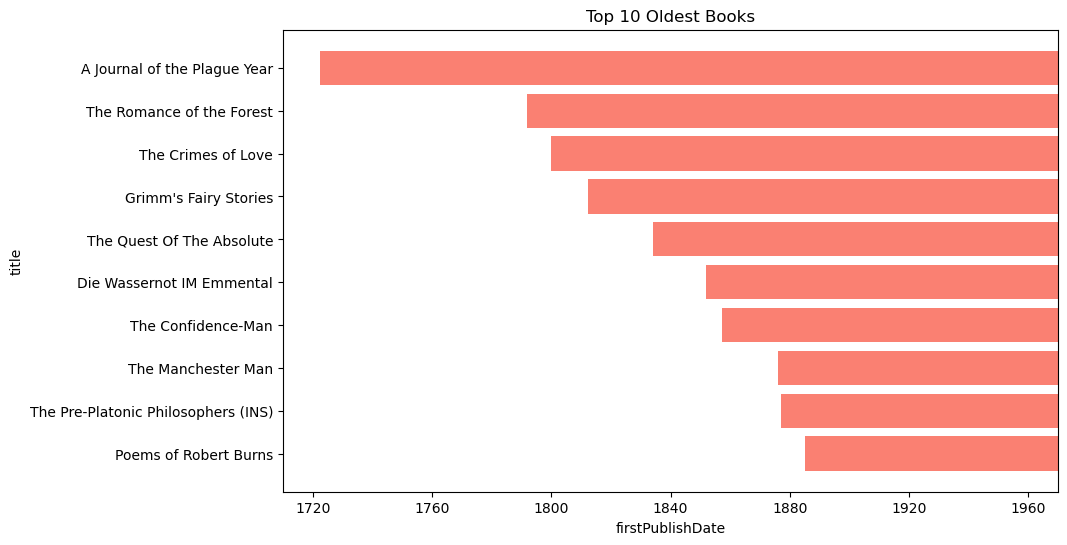

In [21]:
df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors='coerce')

# Sort by publication year and select the 10 oldest books
oldest_books = df.sort_values(by="firstPublishDate").head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(oldest_books["title"], oldest_books["firstPublishDate"], color="salmon")
plt.xlabel("firstPublishDate")
plt.ylabel("title")
plt.title("Top 10 Oldest Books")
plt.gca().invert_yaxis()  # Oldest book at the top
plt.show()


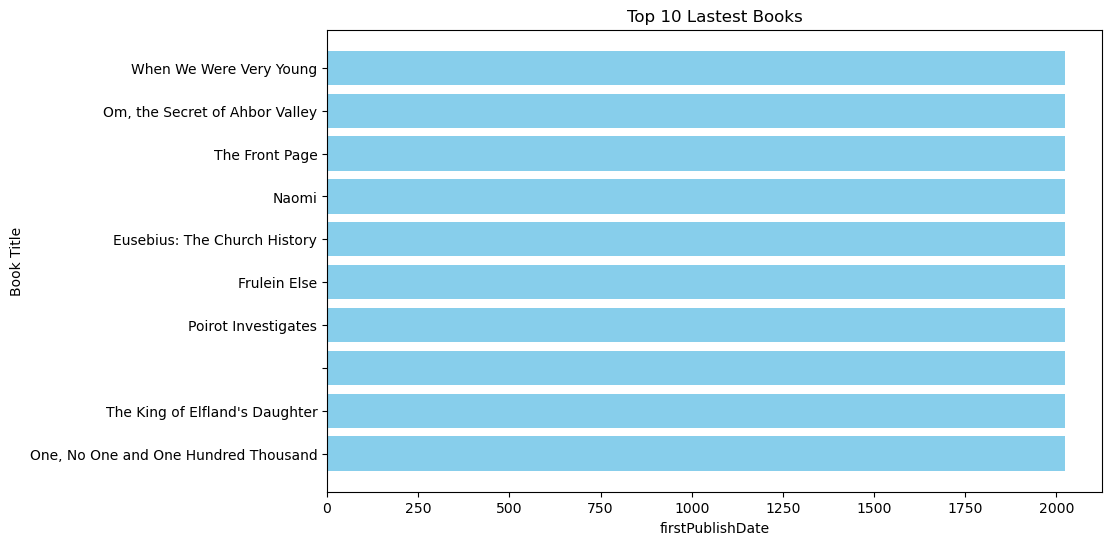

In [31]:

# Convert 'firstPublishDate' to datetime format
df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors='coerce')
df = df.dropna(subset=['firstPublishDate', 'title']).copy()


# Sort by publication date in descending order and select the 10 newest books
Latest_books = df.sort_values(by="firstPublishDate", ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(Latest_books["title"], Latest_books["firstPublishDate"].dt.year, color="skyblue")
plt.xlabel("firstPublishDate")
plt.ylabel("Book Title")
plt.title("Top 10 Lastest Books")
plt.gca().invert_yaxis()  # Newest book at the top
plt.show()


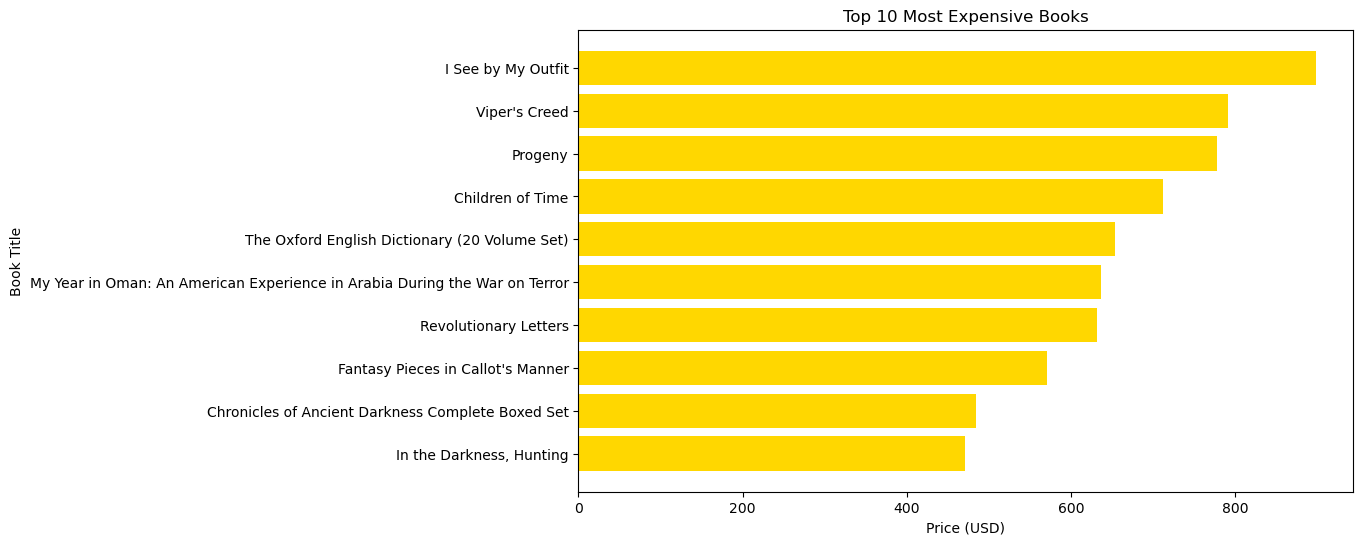

In [33]:


# Convert 'firstPublishDate' to datetime format
df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors='coerce')

# Convert 'price' to numeric, coercing errors to NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN in either 'price' or 'firstPublishDate'
df = df.dropna(subset=['price', 'firstPublishDate'])

# Sort by price in descending order and select the 10 most expensive books
most_expensive_books = df.sort_values(by="price", ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(most_expensive_books["title"], most_expensive_books["price"], color="gold")
plt.xlabel("Price (USD)")
plt.ylabel("Book Title")
plt.title("Top 10 Most Expensive Books")
plt.gca().invert_yaxis()  # Most expensive book at the top
plt.show()
